# Librerias utilizadas

In [1]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import wget
import scipy.io.wavfile as wave
import IPython
from scipy.linalg import toeplitz, inv

# 1. Reproducir diferentes excitaciones u<sub>k</sub>(n) con un parlante y medir su respuesta y<sub>k</sub>(n) con un micrófono, con N = 48000 y fs = 48 kHz.

## a. Señal de música

In [3]:
song_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP2/Grabaciones/Entradas/buttercup_1seg.wav?raw=true'
song_file = wget.download(song_url)

In [4]:
fs, song_array = wave.read(str(song_file))
print("fs = "+str(fs))
print("Number of samples = "+ str(len(song_array)))
IPython.display.Audio(song_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [5]:
song_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/Buttercup.wav'
song_out_file = wget.download(song_out_url)
fs, song_out_array = wave.read(str(song_out_file))
IPython.display.Audio(song_out_array,rate=fs)

## b. Una señal de voz

In [6]:
voice_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Entradas/Okay_1seg.wav'
voice_file = wget.download(voice_url)

In [7]:
fs, voice_array = wave.read(voice_file)
print("fs = "+str(fs))
print("Number of samples = "+ str(len(voice_array)))
IPython.display.Audio(voice_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [8]:
voice_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/okay.wav'
voice_out_file = wget.download(voice_out_url)
fs, voice_out_array = wave.read(str(voice_out_file))
IPython.display.Audio(voice_out_array,rate=fs)

## c. Una señal cuadrada de f<sub>0</sub>=100 Hz

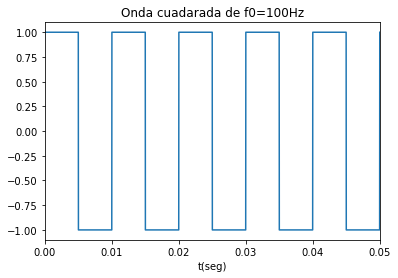

In [9]:
t= np.linspace(start=0,stop=1,num=48000)
f = 100         #Frecuencia fundamental de la onda cuadrada
square_wave = sig.square(2 * np.pi * f * t)
plt.plot(t, square_wave)
plt.title("Onda cuadarada de f0=100Hz")
plt.xlim(left=0,right=0.05)
plt.xlabel("t(seg)")
plt.show()

In [10]:
IPython.display.Audio(square_wave,rate=fs)

Respuesta medida:

In [11]:
square_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/square.wav'
square_out_file = wget.download(square_out_url)
fs, square_out_array = wave.read(str(square_out_file))
IPython.display.Audio(square_out_array,rate=fs)

## d. Un barrido lineal de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [12]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1
K= (f1-f0)/T
x = 2 * np.pi * t * ( f0 + 0.5 * K * t)
lineal_sweep = np.sin(x)

In [13]:
IPython.display.Audio(lineal_sweep,rate=fs)

Respuesta medida:

In [14]:
lineal_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/lineal.wav'
lineal_out_file = wget.download(lineal_out_url)
fs, lineal_out_array = wave.read(str(lineal_out_file))
IPython.display.Audio(lineal_out_array,rate=fs)

## e. Un barrido exponencial de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [15]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1.
K= (f1/f0)**(1./T)
x = 2 * np.pi * f0 * ( ( (K**t)-1 )/math.log(K) )
exp_sweep = np.sin(x)

In [16]:
IPython.display.Audio(exp_sweep,rate=fs)

Respuesta medida:

In [17]:
exp_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/exp.wav'
exp_out_file = wget.download(exp_out_url)
fs, exp_out_array = wave.read(str(exp_out_file))
IPython.display.Audio(exp_out_array,rate=fs)

## f. Ruido blanco guassiano de media cero

In [18]:
noise = np.random.randn(48000)
IPython.display.Audio(noise,rate=fs)

Respuesta medida:

In [19]:
noise_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/noise.wav'
noise_out_file = wget.download(noise_out_url)
fs, noise_out_array = wave.read(str(noise_out_file))
IPython.display.Audio(noise_out_array,rate=fs)

# 2. Estimar el filtro óptimo en cada uno de los casos. Graficar J<sub>min</sub> en función de M, y determinar el valor óptimo de M para cuando no se observe mejora de J<sub>min</sub> con aumento de M. Para ese valor de M, determinar ε y los autovalores de la matriz de autocorrelación. Ordenar los autovalores de mayor a menor, y graficar su distribución.

In [108]:
def r_matrix(vect, M):
    corr = np.correlate(vect,np.conj(vect), mode='same')
    corr = corr[:M]
    r = toeplitz(corr,np.hstack((corr[0], np.conj(corr[1:]))))
    return r

def get_eigenvalues(mat):
    ev = np.linalg.eig(mat)
    return ev

def wiener_coefs(u_n, d_n, M):
    r = r_matrix(u_n, M)
    r_inv = inv(r)
    p = np.correlate(u_n, np.conj(d_n), mode='same') #
    p_m = p[:M]
    w_o = np.dot(r_inv, np.flip(p_m))
#     var_d = np.var(d_n)
#     var_d_hat = np.matmul(np.matmul(p, r_inv), p.reshape((-1, 1)))
#     Jmin = var_d - var_d_hat
#     epsilon = 1 - var_d_hat/(var_d+1e-9)
    return w_o

def search_opt_M(data, desired, M_array):
    plt.plot(data)
    plt.plot(desired)
    plt.show()
    Jmin_s = []
    filtered_arr = []
    for m in M_array:
        print('Starting order ', m)
        w_o = wiener_coefs(data, desired, m)
        print('\n')
        filtered = filterW(data, w_o)
        Jmin, _ = calc_error(filtered, desired)
        Jmin_s.append(Jmin)
        filtered_arr.append(filtered)
    plt.plot(M_array, Jmin_s, marker='o', linestyle='--', color='r', 
             label='Square') 
    plt.xticks(M_array, M_array) 
    plt.show()
    return filtered_arr, Jmin_s
    
        
def filterW(data, w_o):
    samples = len(data)
    M = len(w_o)
    #new_data = np.concatenate((np.zeros(M-1),data))
    filtered = np.zeros(samples)
#     for i in range(samples):
#         sample_coefs = w_o_s[i]
#         filtered[i] = np.multiply(np.flip(sample_coefs), new_data[i:i+M]).sum(axis=0)
    filtered = sig.filtfilt(w_o, [1], data)
    plt.plot(filtered)
    plt.show()
    return filtered

def calc_error(filtered, desired):
    var_d = np.var(desired)
    var_d_hat = np.var(filtered)
    Jmin = var_d - var_d_hat
    eps = 1 - var_d_hat/var_d
    return Jmin, eps

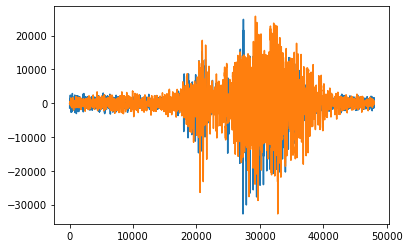

Starting order  100




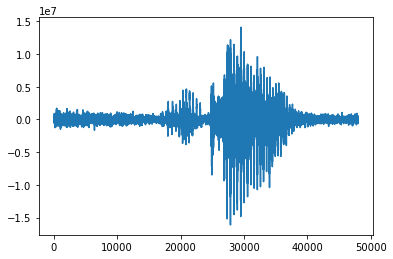

Starting order  150




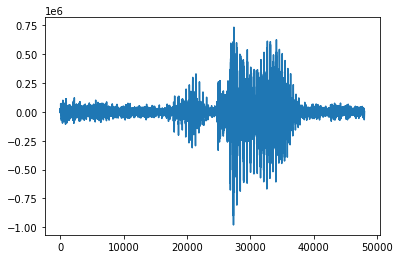

Starting order  200




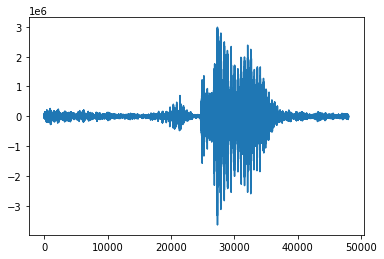

Starting order  250




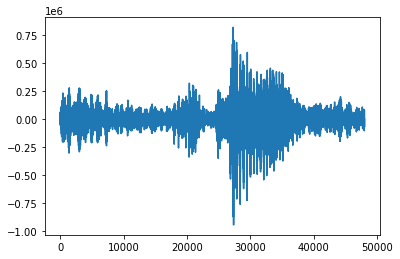

Starting order  300




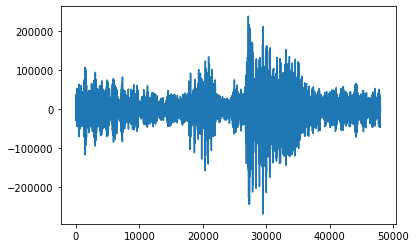

Starting order  350




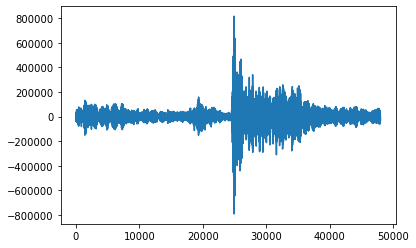

Starting order  400




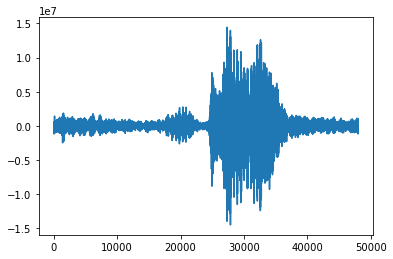

Starting order  450




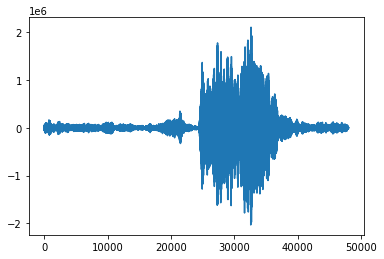

Starting order  500




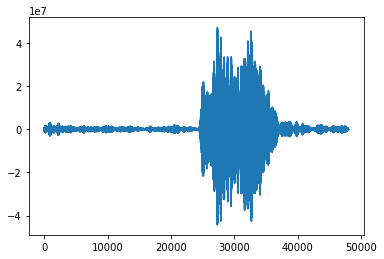

Starting order  550




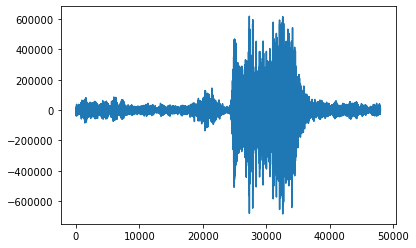

Starting order  600




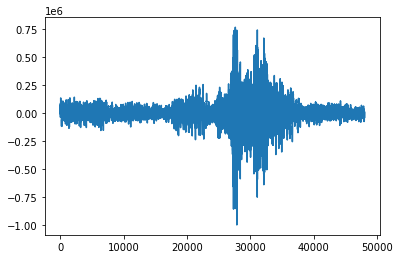

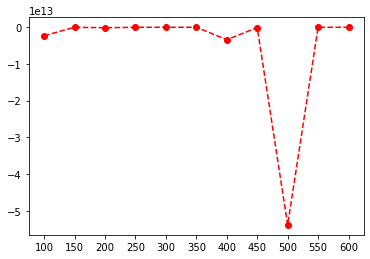

In [109]:
u_n = voice_array
d_n = voice_out_array
# data = u_n/np.amax(abs(u_n))
# desired = d_n/np.amax(abs(d_n))
data = u_n
desired = d_n
filtered_arr, Jmin_s = search_opt_M(data-np.mean(data), desired-np.mean(desired), [100,150,200,250,300,350,400,450
                                                                                   ,500,550,600])

In [104]:
IPython.display.Audio(voice_array,rate=fs)

In [105]:
IPython.display.Audio(voice_out_array,rate=fs)

In [106]:
IPython.display.Audio(filtered_arr[3],rate=fs)